In [1]:
## Importing the libraries

import pandas as pd
from sklearn.linear_model import LinearRegression

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Library to split data 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Loading the Training Data and using the Training Data to build the Model

In [2]:
df_train = pd.read_csv('c:/Users/virup/Downloads/hackathon/Train_dataset_(1).csv')
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [3]:
df_train.shape

(3493, 34)

In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Registration Number,3493.0,6.174700e+04,1.008487e+03,60001.0,60874.0,61747.00,6.262000e+04,6.349300e+04
Annual Turnover,3493.0,3.072571e+07,2.165125e+07,3500000.0,18000000.0,30000000.00,3.700000e+07,4.000000e+08
Facebook Popularity Quotient,3394.0,7.793872e+01,9.829169e+00,43.0,72.0,79.00,8.574500e+01,9.776000e+01
Instagram Popularity Quotient,3437.0,7.440468e+01,1.094033e+01,40.0,66.0,74.05,8.240000e+01,9.870000e+01
Fire Audit,3493.0,7.887203e-01,4.082748e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Liquor License Obtained,3493.0,9.882622e-01,1.077187e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Situated in a Multi Complex,3493.0,8.081878e-01,3.937825e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Dedicated Parking,3493.0,8.018895e-01,3.986329e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Open Sitting Available,3493.0,8.001718e-01,3.999284e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Resturant Tier,3444.0,1.926539e+00,2.609297e-01,1.0,2.0,2.00,2.000000e+00,2.000000e+00


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [6]:
## Checking for the null values

df_train.isnull().sum()

Registration Number                 0
Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs 

#### Summary of the train dataset

In [7]:
df_train['Opening Day of Restaurant'] = pd.to_datetime(df_train['Opening Day of Restaurant'])

# Calculate the age of the restaurant in years
current_date = pd.to_datetime('today')
df_train['age'] = (current_date - df_train['Opening Day of Restaurant']).dt.days / 365.25


C:\Users\virup\AppData\Local\Temp\ipykernel_10580\2708549861.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_train['Opening Day of Restaurant'] = pd.to_datetime(df_train['Opening Day of Restaurant'])


In [8]:
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy,age
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,2009-02-14,84.3,Not Specific,95.8,1,...,4.0,NaN,NaN,NaN,8.0,8,6,6,6,15.378508
1,60002,50000000,"indian,irish",Indore,Near Party Hub,2008-09-29,85.4,Tier A Celebrity,85.0,1,...,NaN,4.0,NaN,NaN,5.0,7,7,3,8,15.756331
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,2011-07-30,85.0,Tier A Celebrity,68.2,1,...,3.0,NaN,NaN,NaN,7.0,10,5,2,8,12.925394
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,2008-11-30,85.6,Tier A Celebrity,83.6,0,...,6.0,NaN,NaN,NaN,7.0,7,4,3,5,15.586585
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,2010-02-22,NaN,Tier A Celebrity,76.8,1,...,NaN,2.0,NaN,NaN,NaN,6,2,4,6,14.357290


### Feature Selection

In [9]:
# drop following columns as these columns are not so important : 
cols_to_drop = ['Opening Day of Restaurant','City','Registration Number', 'Endorsed By','Fire Audit',
                'Situated in a Multi Complex', 'Dedicated Parking','Lively', 'Ambience',
        'Open Sitting Available', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Music Rating', 'Live Sports Rating',
                #new solumns after lasso regression
               #'Hygiene Rating', 'Food Rating', 'Service', 'Privacy', 'Comfortablility', 
                    'Restaurant Zomato Rating',
                'Privacy', 'Comfortablility', 
                'Restaurant Theme']


In [10]:
print(df_train.columns)


Index(['Registration Number', 'Annual Turnover', 'Cuisine', 'City',
       'Restaurant Location', 'Opening Day of Restaurant',
       'Facebook Popularity Quotient', 'Endorsed By',
       'Instagram Popularity Quotient', 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating',
       'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating',
       'Value Deals Rating', 'Live Sports Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy', 'age'],
      dtype='object')


In [11]:
df_train['Restaurant Type'] = df_train['Restaurant Type'].replace('Buffet/Family Restaurant', 'Buffet')

df_train['Restaurant Type'].unique()

array(['Bar', 'Caffee', 'Gastro Bar', 'Buffet'], dtype=object)

In [12]:
df_train['Restaurant Type'].isnull().sum()

0

In [13]:

df_train.drop(cols_to_drop,axis=1, inplace=True)
df_train.head()

,Annual Turnover,Cuisine,Restaurant Location,Facebook Popularity Quotient,Instagram Popularity Quotient,Liquor License Obtained,Resturant Tier,Restaurant Type,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Service,age
0,42000000,"indian,irish",Near Business Hub,84.3,95.8,1,2.0,Bar,0,2,5,5,5,7,10.0,6,15.378508
1,50000000,"indian,irish",Near Party Hub,85.4,85.0,1,2.0,Bar,0,6,6,6,7,8,9.0,7,15.756331
2,32500000,"tibetan,italian",Near Business Hub,85.0,68.2,1,2.0,Bar,0,2,6,5,3,7,8.0,5,12.925394
3,110000000,"turkish,nigerian",Near Party Hub,85.6,83.6,1,1.0,Bar,1,7,6,5,6,8,9.0,4,15.586585
4,20000000,"irish,belgian",Near Party Hub,NaN,76.8,1,NaN,Bar,0,10,5,6,4,8,6.0,2,14.357290


In [14]:
df_train.isnull().sum()

Annual Turnover                    0
Cuisine                            0
Restaurant Location                0
Facebook Popularity Quotient      99
Instagram Popularity Quotient     56
Liquor License Obtained            0
Resturant Tier                    49
Restaurant Type                    0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating        212
Service                            0
age                                0
dtype: int64

In [15]:
#Convert the 'Opening Day of Restaurant' to numerical column i.e. age 

### Univariate analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
#histogram_boxplot(df_train, "Food Rating")

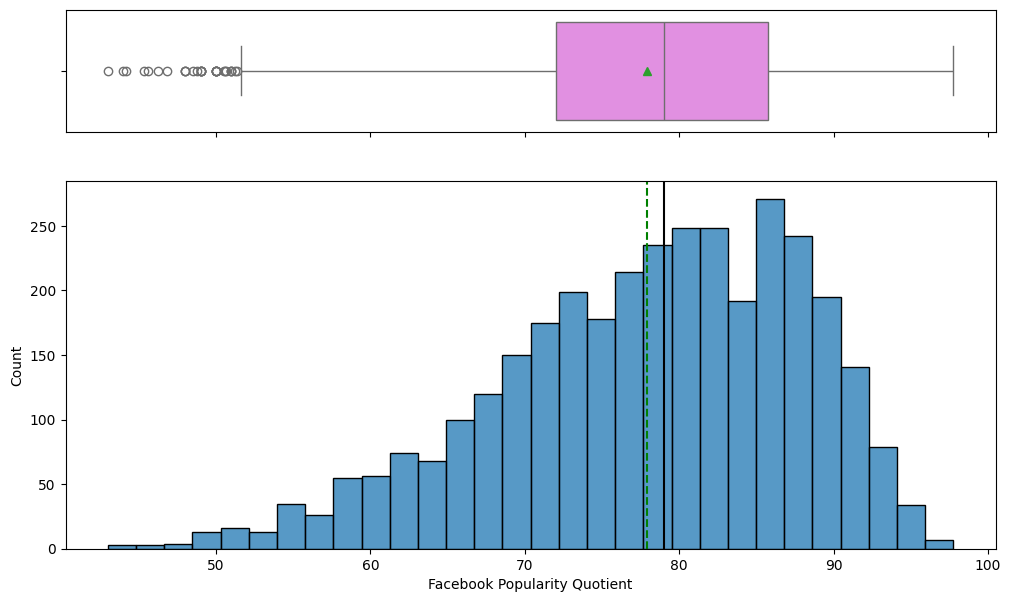

In [18]:
histogram_boxplot(df_train, "Facebook Popularity Quotient")

In [19]:
# Treat outliers of 'Facebook Popularity Quotient' 
q_lower = df_train['Facebook Popularity Quotient'].quantile(0.05)
q_upper = df_train['Facebook Popularity Quotient'].quantile(0.95)

# Winsorizing outliers
#df['Facebook Popularity Quotient Winsorized'] = winsorize(df['Facebook Popularity Quotient'], (0.05, 0.05))

# Alternatively, you can replace outliers with NaN or drop them
df_train.loc[df_train['Facebook Popularity Quotient'] < q_lower, 'Facebook Popularity Quotient'] = np.nan
df_train.loc[df_train['Facebook Popularity Quotient'] > q_upper, 'Facebook Popularity Quotient'] = np.nan
df_train.dropna(inplace=True)


In [20]:
#histogram_boxplot(df_train, "Restaurant Zomato Rating")

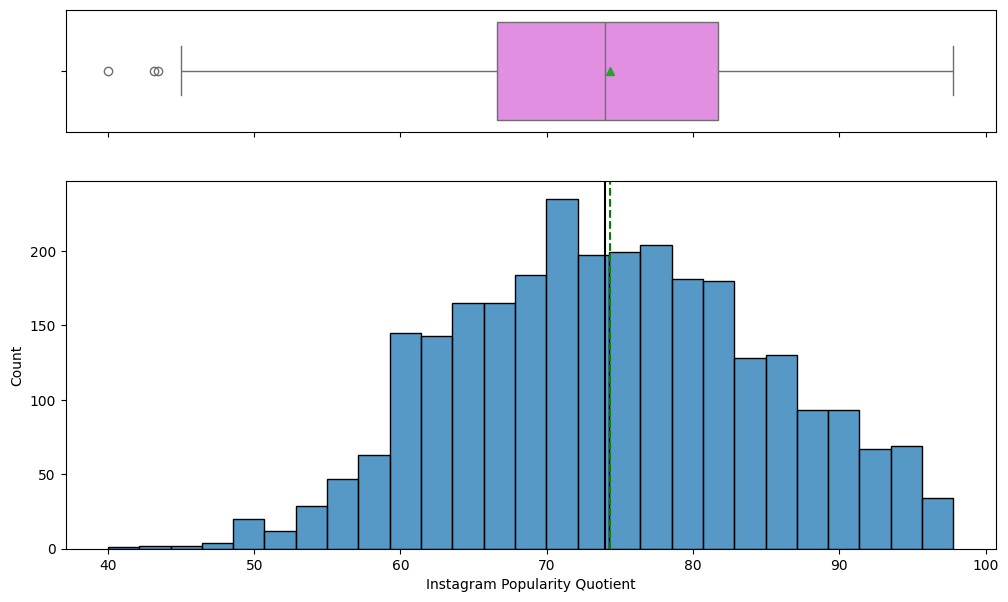

In [21]:
histogram_boxplot(df_train, 'Instagram Popularity Quotient')

In [22]:
# Treat outliers of 'Facebook Popularity Quotient' 
q_lower = df_train['Instagram Popularity Quotient'].quantile(0.05)
q_upper = df_train['Instagram Popularity Quotient'].quantile(0.95)

# Winsorizing outliers
#df['Facebook Popularity Quotient Winsorized'] = winsorize(df['Facebook Popularity Quotient'], (0.05, 0.05))

# Alternatively, you can replace outliers with NaN or drop them
df_train.loc[df_train['Instagram Popularity Quotient'] < q_lower, 'Instagram Popularity Quotient'] = np.nan
df_train.loc[df_train['Instagram Popularity Quotient'] > q_upper, 'Instagram Popularity Quotient'] = np.nan
df_train.dropna(inplace=True)


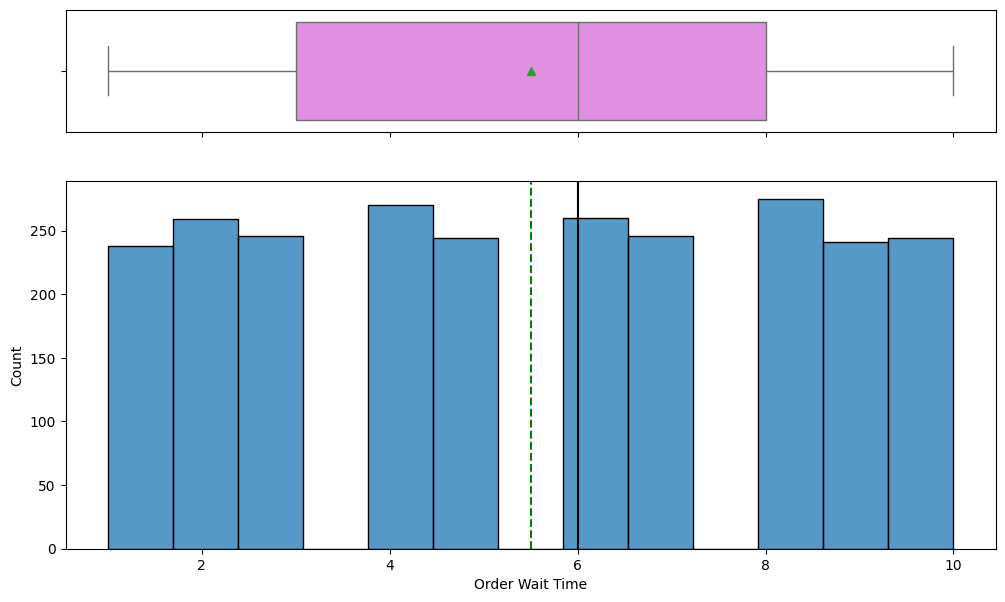

In [23]:
histogram_boxplot(df_train, "Order Wait Time")

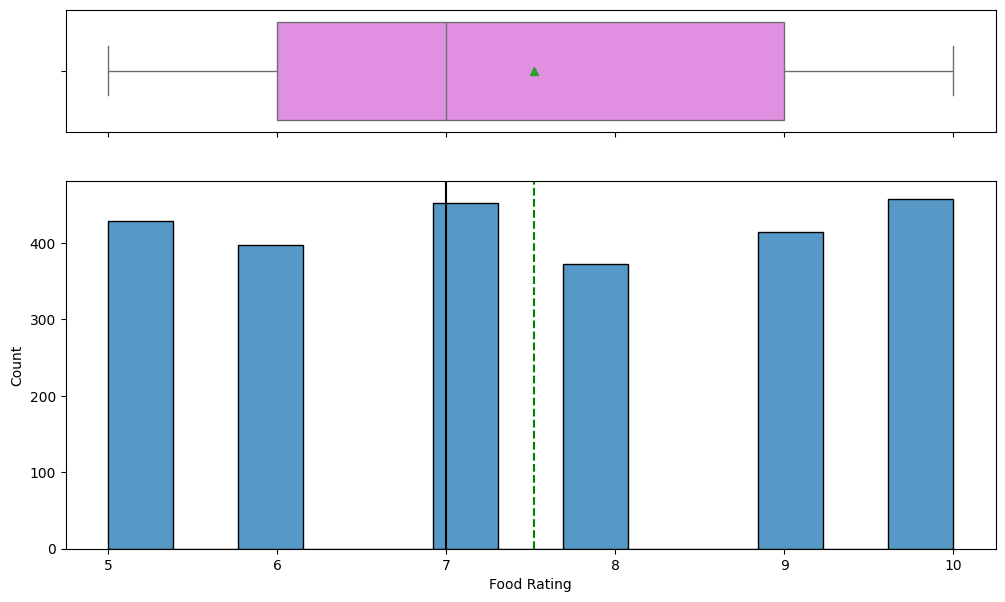

In [24]:
histogram_boxplot(df_train, 'Food Rating')

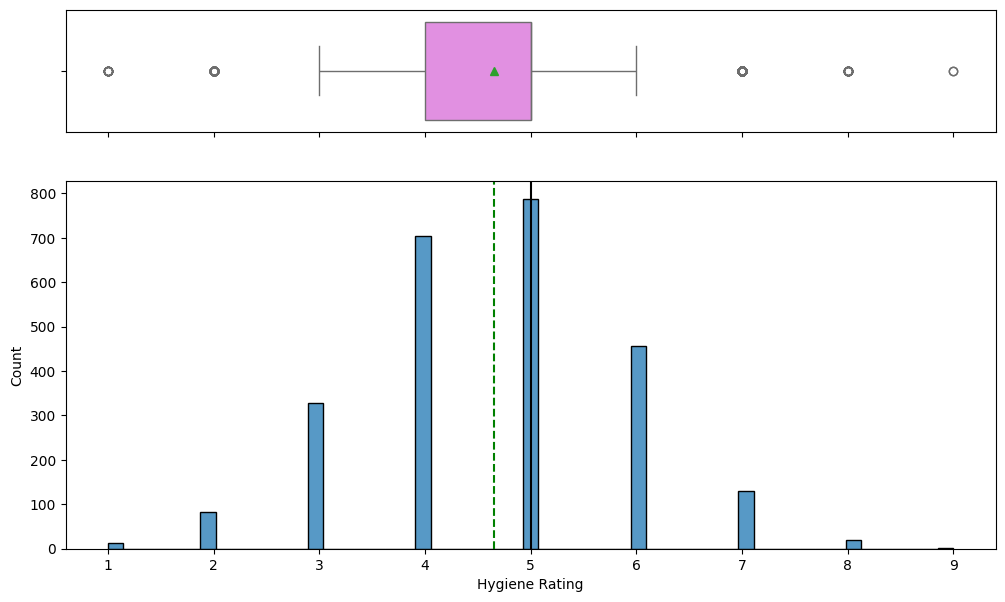

In [25]:
histogram_boxplot(df_train, 'Hygiene Rating')

In [26]:
#histogram_boxplot(df_train, "Resturant Tier")

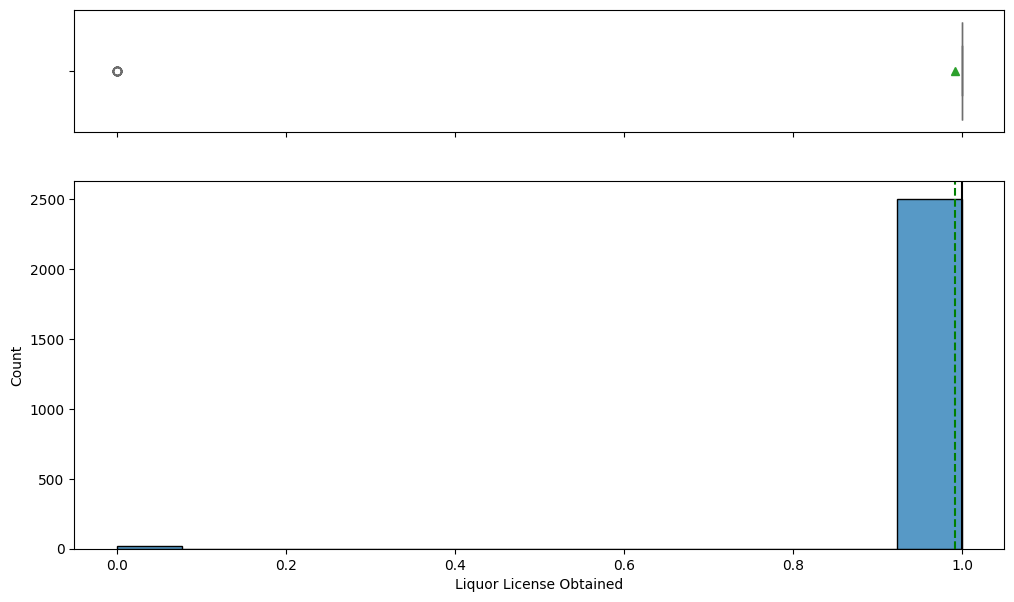

In [27]:
histogram_boxplot(df_train, "Liquor License Obtained")

### Bivariate Analysis

C:\Users\virup\AppData\Local\Temp\ipykernel_10580\2725182143.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")


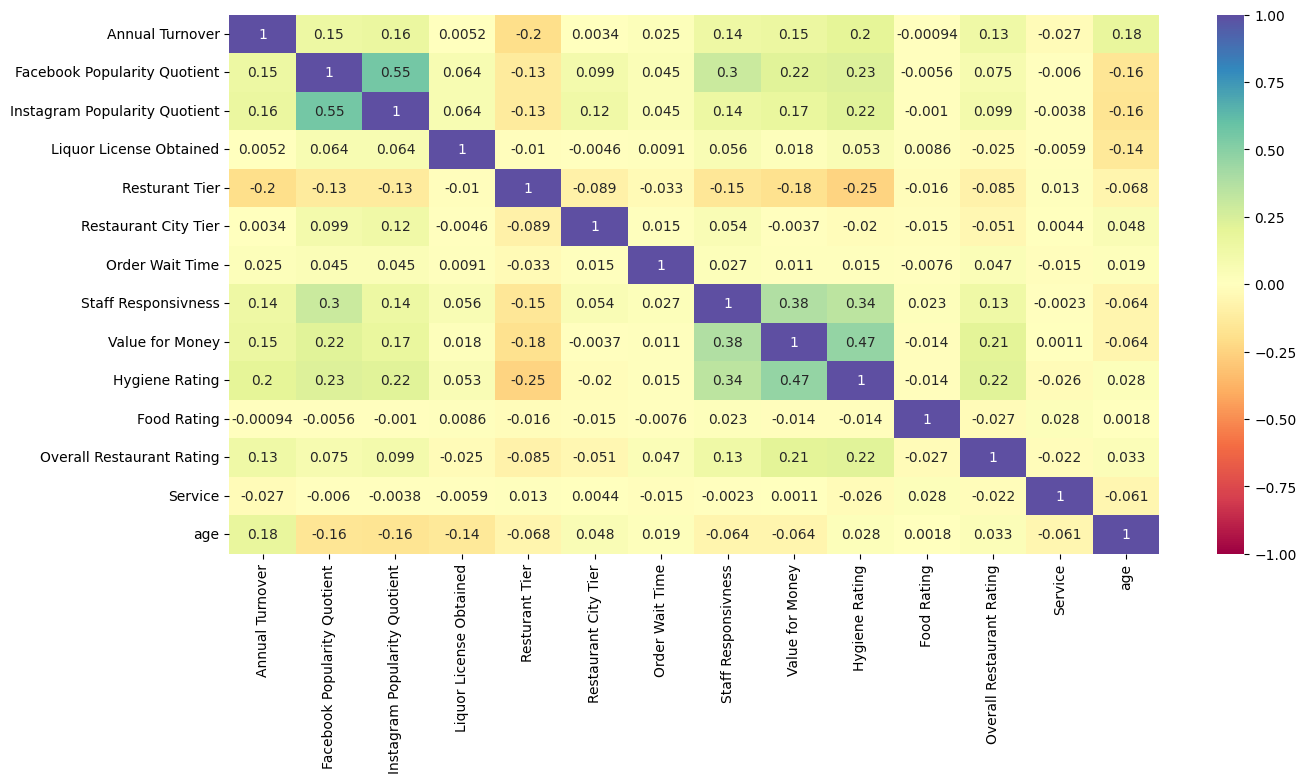

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(df_train.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

In [29]:
#sns.pairplot(data=df_train,hue="Annual Turnover")
#plt.show()

In [30]:
### Function to plot boxplot
def boxplot(x):
    plt.figure(figsize=(10,7))
    sns.boxplot(data=df_train, x="Annual Turnover",y=df_train[x],palette="PuBu")
    plt.show()

### Data Processing 

In [31]:
## Importing Simple Imputer to treat the null values

from sklearn.impute import SimpleImputer

In [32]:
## Defning the Simple Imputer funtion to use 'mean' as a strategy of imputation
#columns_to_impute = ['Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Overall Restaurant Rating']
columns_to_impute = ['Facebook Popularity Quotient', 'Overall Restaurant Rating']
SI = SimpleImputer(strategy='mean')

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
## Fitting the Simple Imputer function to get the mean of the variable
## Transforming the variable --> Imputing the variable with its mean

df_train[columns_to_impute] = SI.fit_transform(df_train[columns_to_impute])
df_train.isnull().sum()

Annual Turnover                  0
Cuisine                          0
Restaurant Location              0
Facebook Popularity Quotient     0
Instagram Popularity Quotient    0
Liquor License Obtained          0
Resturant Tier                   0
Restaurant Type                  0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsivness              0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Service                          0
age                              0
dtype: int64

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2523 entries, 1 to 3491
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual Turnover                2523 non-null   int64  
 1   Cuisine                        2523 non-null   object 
 2   Restaurant Location            2523 non-null   object 
 3   Facebook Popularity Quotient   2523 non-null   float64
 4   Instagram Popularity Quotient  2523 non-null   float64
 5   Liquor License Obtained        2523 non-null   int64  
 6   Resturant Tier                 2523 non-null   float64
 7   Restaurant Type                2523 non-null   object 
 8   Restaurant City Tier           2523 non-null   int64  
 9   Order Wait Time                2523 non-null   int64  
 10  Staff Responsivness            2523 non-null   int64  
 11  Value for Money                2523 non-null   int64  
 12  Hygiene Rating                 2523 non-null   i

In [36]:
## Fitting the Linear Regression function
# Preprocessing pipelines
X_train = df_train.drop(columns=['Annual Turnover'])

y_train = df_train['Annual Turnover']
# Columns to encode
categorical_features = ['Cuisine', 'Restaurant Location', 'Restaurant Type']
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ensure to exclude the target variable
numeric_features = [feature for feature in numeric_features if feature != 'Annual Turnover']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')  # Avoid multicollinearity

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X__train_preprocessed = preprocessor.fit_transform(X_train)

#X_train1, X_test1, y_train1, y_test1 = train_test_split(X__train_preprocessed, y_train, test_size=0.3, random_state=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X__train_preprocessed, y_train, test_size=0.3, random_state=1)
print(X_train1.shape, X_test1.shape)

model = LinearRegression()
model.fit(X_train1, y_train1)

# Predictions using Random Forest Regressor
#y_pred_rf_reg = rf_reg.predict(X_test1)
#y_pred_lin_reg = lin_reg.predict(X_test1)

#model = LinearRegression()

model.fit(X__train_preprocessed,y_train)

(1766, 35) (757, 35)


LinearRegression()

In [37]:
## Checking the score of the function on the training data

model.score(X__train_preprocessed,y_train)

0.14647268463174512

In [38]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf


lin_reg_model1_perf_train = model_performance_regression(
    model, X_test1, y_test1
)
lin_reg_model1_perf_train

In [39]:
y_pred_lin_reg = model.predict(X_test1)
print("Random Forest Regressor Performance:")
print("MSE:", mean_squared_error(y_test1, y_pred_lin_reg))
print("MAE:", mean_absolute_error(y_test1, y_pred_lin_reg))
print("R²:", r2_score(y_test1, y_pred_lin_reg))
rmse_rf_reg = np.sqrt(mean_squared_error(y_test1, y_pred_lin_reg))
print("RMSE:", rmse_rf_reg)


Random Forest Regressor Performance:
MSE: 222484721665452.38
MAE: 10197947.891648533
R²: 0.2177602142193411
RMSE: 14915921.750446815


from sklearn.linear_model import Lasso

# Train Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X__train_preprocessed, y_train)



# Check coefficients
lasso_coefs = lasso.coef_
print("Lasso Coefficients:")
for feature, coef in zip(X_train.columns, lasso_coefs):
    print(f"{feature}: {coef}")
    


In [40]:
X_train.head()

,Cuisine,Restaurant Location,Facebook Popularity Quotient,Instagram Popularity Quotient,Liquor License Obtained,Resturant Tier,Restaurant Type,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Service,age
1,"indian,irish",Near Party Hub,85.40,85.00,1,2.0,Bar,0,6,6,6,7,8,9.0,7,15.756331
2,"tibetan,italian",Near Business Hub,85.00,68.20,1,2.0,Bar,0,2,6,5,3,7,8.0,5,12.925394
3,"turkish,nigerian",Near Party Hub,85.60,83.60,1,1.0,Bar,1,7,6,5,6,8,9.0,4,15.586585
6,"indian,irish",Near Party Hub,86.08,67.50,1,2.0,Bar,1,2,5,4,3,10,7.0,2,12.427105
15,"tibetan,italian",Near Business Hub,69.54,64.43,1,2.0,Bar,0,8,4,5,3,5,7.0,6,14.584531


In [41]:
X_train.shape

(2523, 16)

In [42]:
X_train.columns

Index(['Cuisine', 'Restaurant Location', 'Facebook Popularity Quotient',
       'Instagram Popularity Quotient', 'Liquor License Obtained',
       'Resturant Tier', 'Restaurant Type', 'Restaurant City Tier',
       'Order Wait Time', 'Staff Responsivness', 'Value for Money',
       'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Service',
       'age'],
      dtype='object')

# Loading the Test Data and using the Test Data to Predict the target Variable

In [43]:
df_test = pd.read_csv('c:/Users/virup/Downloads/hackathon/Test_dataset_(1).csv')
df_test1 = df_test.copy()
df_test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [44]:
## Checking for the null values

df_test.isnull().sum()

Registration Number                0
Cuisine                            0
City                               0
Restaurant Location                0
Opening Day of Restaurant          0
Facebook Popularity Quotient       0
Endoresed By                       0
Instagram Popularity Quotient      0
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                     0
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating         34
Live Music Rating                102
Comedy Gigs Rating               370
Value Deals Rating               385
L

In [45]:
df_test.shape

(500, 33)

In [46]:
df_test['Restaurant Type'] = df_test['Restaurant Type'].replace('Buffet/Family Restaurant', 'Buffet')

df_test['Restaurant Type'].unique()

array(['Bar', 'Gastro Bar', 'Caffee', 'Buffet'], dtype=object)

In [47]:
df_test.rename(columns={
    'Endoresed By': 'Endorsed By',
}, inplace=True)



In [48]:
df_test['Opening Day of Restaurant'] = pd.to_datetime(df_test['Opening Day of Restaurant'])

# Calculate the age of the restaurant in years
current_date = pd.to_datetime('today')
df_test['age'] = (current_date - df_test['Opening Day of Restaurant']).dt.days / 365.25


C:\Users\virup\AppData\Local\Temp\ipykernel_10580\2342135922.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_test['Opening Day of Restaurant'] = pd.to_datetime(df_test['Opening Day of Restaurant'])


In [49]:
df_test.drop(cols_to_drop,axis=1, inplace=True)
df_test.head()

,Cuisine,Restaurant Location,Facebook Popularity Quotient,Instagram Popularity Quotient,Liquor License Obtained,Resturant Tier,Restaurant Type,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Service,age
0,"tibetan,italian",Near Business Hub,78.00,69.00,1,2,Bar,0,10,5,3,5,8,6.0,2,13.971253
1,"tibetan,italian",Near Party Hub,89.17,96.00,1,2,Bar,0,10,4,5,6,8,9.0,5,13.149897
2,"algerian,belgian",Near Party Hub,84.00,86.00,1,2,Bar,0,6,5,5,6,9,6.0,5,12.577687
3,"tibetan,greek",Near Party Hub,79.38,74.40,1,2,Gastro Bar,0,10,5,5,5,9,9.0,6,19.457906
4,"cuban,british",Near Party Hub,84.67,86.46,1,1,Bar,1,7,5,5,7,8,NaN,7,15.723477


In [50]:
df_test[columns_to_impute] = SI.transform(df_test[columns_to_impute])
df_test.isnull().sum()

Cuisine                          0
Restaurant Location              0
Facebook Popularity Quotient     0
Instagram Popularity Quotient    0
Liquor License Obtained          0
Resturant Tier                   0
Restaurant Type                  0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsivness              0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Service                          0
age                              0
dtype: int64

In [51]:
df_test.columns


Index(['Cuisine', 'Restaurant Location', 'Facebook Popularity Quotient',
       'Instagram Popularity Quotient', 'Liquor License Obtained',
       'Resturant Tier', 'Restaurant Type', 'Restaurant City Tier',
       'Order Wait Time', 'Staff Responsivness', 'Value for Money',
       'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Service',
       'age'],
      dtype='object')

In [52]:
print(df_test[227:229])

              Cuisine Restaurant Location  Facebook Popularity Quotient  \
227  algerian,belgian   Near Business Hub                         69.00   
228     tibetan,greek      Near Party Hub                         74.88   

     Instagram Popularity Quotient  Liquor License Obtained  Resturant Tier  \
227                          69.12                        1               1   
228                          82.55                        1               2   

    Restaurant Type  Restaurant City Tier  Order Wait Time  \
227             Bar                     0                8   
228             Bar                     0                7   

     Staff Responsivness  Value for Money  Hygiene Rating  Food Rating  \
227                    4                5               6            5   
228                    5                4               5            9   

     Overall Restaurant Rating  Service        age  
227                   8.475228        4  13.325120  
228                 

In [53]:
X_test = df_test
X_test_transformed = preprocessor.transform(X_test)
predictions = model.predict(X_test_transformed)


C:\Users\virup\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Random Forest Model 

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
!pip install xgboost


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as  xgb


X_train1, X_test1, y_train1, y_test1 = train_test_split(X__train_preprocessed, y_train, test_size=0.3, random_state=1)
print(X_train1.shape, X_test1.shape)
# Train Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train1, y_train1)

xgbmodel = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds=50, learning_rate=0.01)
xgbmodel.fit (X_train1, y_train1,
          eval_set=[(X_train1, y_train1), (X_test1, y_test1)], 
          verbose=100)

lin_reg = LinearRegression()
lin_reg.fit(X_train1, y_train1)


# Predictions using Random Forest Regressor
y_pred_rf_reg = rf_reg.predict(X_test1)
y_pred_lin_reg = lin_reg.predict(X_test1)
y_pred_xgb_reg = xgbmodel.predict(X_test1)


print("Random Forest Regressor Performance:")
print("MSE:", mean_squared_error(y_test1, y_pred_rf_reg))
print("MAE:", mean_absolute_error(y_test1, y_pred_rf_reg))
print("R²:", r2_score(y_test1, y_pred_rf_reg))
rmse_rf_reg = np.sqrt(mean_squared_error(y_test1, y_pred_rf_reg))
print("RMSE:", rmse_rf_reg)

print("Linear Regression Performance:")
print("MSE:", mean_squared_error(y_test1, y_pred_lin_reg))
print("MAE:", mean_absolute_error(y_test1, y_pred_lin_reg))
print("R²:", r2_score(y_test1, y_pred_lin_reg))
rmse_lin_reg = np.sqrt(mean_squared_error(y_test1, y_pred_lin_reg))
print("RMSE:", rmse_lin_reg)

print("XGBoost Regression Performance:")
print("MSE:", mean_squared_error(y_test1, y_pred_xgb_reg))
print("MAE:", mean_absolute_error(y_test1, y_pred_xgb_reg))
print("R²:", r2_score(y_test1, y_pred_xgb_reg))
rmse_xgb_reg = np.sqrt(mean_squared_error(y_test1, y_pred_xgb_reg))
print("RMSE:", rmse_xgb_reg)



(1766, 35) (757, 35)
[0]	validation_0-rmse:22413049.84312	validation_1-rmse:16876917.02954
[95]	validation_0-rmse:17576720.85602	validation_1-rmse:16650214.76918
Random Forest Regressor Performance:
MSE: 255295473380449.16
MAE: 11103898.282694848
R²: 0.10240004386375634
RMSE: 15977968.374622887
Linear Regression Performance:
MSE: 235685199291123.9
MAE: 10511372.249319235
R²: 0.17134831360517366
RMSE: 15352042.186338725
XGBoost Regression Performance:
MSE: 267724834869877.0
MAE: 11284098.78996037
R²: 0.05869930982589722
RMSE: 16362299.19265251


In [57]:
## Using the model built on the Training set to predict on the Test Set

predictions

array([23090769.66818193, 35898663.78217994, 28568471.67745475,
       47448563.53795478, 48122284.77812994, 33183523.76235382,
       30001653.93459355, 39064985.09193334, 30138510.63530517,
       17148909.48594982, 22366011.64645647, 36972224.37472285,
       36717216.6532886 , 28032553.60542811, 15342244.79213414,
       34561549.65814582, 38610005.30661021, 17654299.83260065,
       38440783.29332601, 28697631.00332855, 23985111.5719268 ,
       33406096.14951778, 25235964.32219201, 21948163.87462955,
       35867125.81553297, 22776566.78030431, 39253267.16782077,
       32574919.07494535, 27577004.51306332, 29057662.20169876,
       33993685.81409431, 36415282.6072383 , 32031639.82215022,
       37931497.56723185, 23725860.7344953 , 24895302.65046552,
       39756364.24649466, 33002892.67113575, 21762585.34590174,
       24526716.43229065, 32694156.0487273 , 24941294.54866923,
       27705536.84417777, 24262007.04115478, 42180158.72405989,
       22385439.08042507, 25043303.16439

# Saving the output in a data frame and then exporting it to a '.csv' file with the appropriate 'Registration Number'.

In [58]:
solution_df = pd.DataFrame(df_test1['Registration Number'])
solution_df

,Registration Number
0,20001
1,20002
2,20003
3,20004
4,20005
...,...
495,20496
496,20497
497,20498
498,20499


In [59]:
solution_df['Annual Turnover'] = predictions
solution_df

,Registration Number,Annual Turnover
0,20001,2.309077e+07
1,20002,3.589866e+07
2,20003,2.856847e+07
3,20004,4.744856e+07
4,20005,4.812228e+07
...,...,...
495,20496,3.226543e+07
496,20497,3.228983e+07
497,20498,3.114891e+07
498,20499,3.972163e+07


In [60]:
## Setting the directory to export the file as a '.csv'

import os
#os.chdir('D:/Hackathon')
os.chdir('c:/Users/virup/Downloads/hackathon')

In [61]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

solution_df.to_csv('Submission.csv',index=False)

# END